# Figure 3.03 Michaelis-Menten kinetics

In [1]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays
using Setfield

using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
# Full enzyme catalysis model
function full_model!(du, u, p, t)
	@unpack ET, K1, KM1, K2 = p
	@unpack S, ES, P = u
	freeEnz = ET - ES
	v1 = K1 * S * freeEnz - KM1 * ES
	v2 = K2 * ES
	du.S = - v1
	du.ES = v1 - v2
	du.P = v2
	return du
end

full_model! (generic function with 1 method)

In [4]:
# Apply QSSA on the ES complex to reduce the model complexity
function reduced_model!(du, u, p, t)
	@unpack ET, K1, KM1, K2 = p
	@unpack S = u
	km = (KM1 + K2) / K1
	du.S = -K2 * ET * hill(S, km)
	return du
end

reduced_model! (generic function with 1 method)

In [5]:
u0 = LVector(S= 5.0, ES = 0.0, P = 0.0)
tend = 1.0
p = (ET = 1.0, K1 = 30.0, KM1 = 1.0, K2 = 10.0)
sol = solve(ODEProblem(full_model!, u0, tend, p));

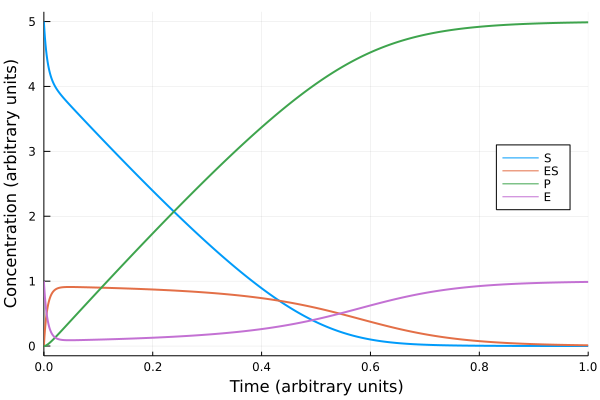

In [6]:
p1 = plot(sol)
plot!(p1, sol, vars=((t, es) -> (t, p.ET - es), 0, 2), label="E")
plot!(p1, xlabel="Time (arbitrary units)", ylabel="Concentration (arbitrary units)", 
     legend=:right)

In [7]:
u0R = LVector(S = sum(u0))
solr = solve(ODEProblem(reduced_model!, u0R, tend, p));

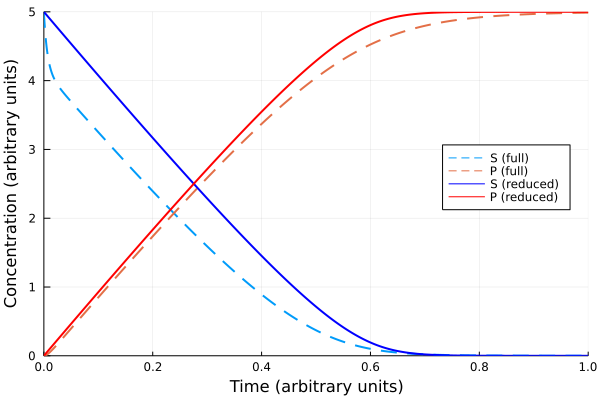

In [9]:
p2 = plot(sol, vars=(0, [1, 3]), line=(:dash), label=["S (full)" "P (full)"])
plot!(p2, solr, line=(:blue), lab="S (reduced)")
plot!(p2, solr, vars=((t, s)->(t, u0R[1] - s), 0, 1), line=(:red), lab="P (reduced)")
plot!(p2, xlabel="Time (arbitrary units)",  ylabel="Concentration (arbitrary units)", xlims=(0.0,1.0), ylims=(0.0,5.0), legend = :right)